# Combinatorics

In [1]:
import math
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D

## Cartesian Product

In mathematics, specifically set theory, the Cartesian product of two sets A and B, denoted A × B, is the set of all ordered pairs (a, b) where a is in A and b is in B.

$$ \mathbf{A} \times \mathbf{B} = \{ (\boldsymbol{\alpha}, \boldsymbol{\beta}) | \boldsymbol{\alpha} \in \mathbf{A}, \boldsymbol{\beta} \in \mathbf{B} \} $$

$$ |\mathbf{A} \times \mathbf{B}| = |\mathbf{A}| \times |\mathbf{B}| $$

In [2]:
def cartesian(*arrays) -> np.matrix:
    """
    Generate a cartesian product of input arrays.
    """
    if len(arrays) == 1:
        return arrays[0]
    X: np.array = arrays[0]
    Y: np.matrix = cartesian(*arrays[1:])
    X = X.reshape(X.shape[0], X.shape[1] if X.ndim > 1 else 1)
    Y = Y.reshape(Y.shape[0], Y.shape[1] if Y.ndim > 1 else 1)
    n: int = Y.shape[0] * X.shape[0]
    X = np.repeat(X, Y.shape[0], axis=0)
    Y = np.tile(Y, (int(n / Y.shape[0]), 1))
    return np.insert(Y, 0, X.T[0], axis=1)

Find the cartesian product of `(0, 1)`, `(2, 3)` & `(4, 5)`.

In [3]:
X: np.matrix = np.array([ 0, 1 ])
Y: np.matrix = np.array([ 2, 3 ])
Z: np.matrix = np.array([ 4, 5 ])
print(cartesian(X, Y, Z))

[[0 2 4]
 [0 2 5]
 [0 3 4]
 [0 3 5]
 [1 2 4]
 [1 2 5]
 [1 3 4]
 [1 3 5]]


Find the cartesian product of `(0, 1)`, & `(0, 1, 2)`.

In [4]:
X: np.array = np.arange(2)
Y: np.array = np.arange(3)
print(cartesian(X, Y))

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]]


Find the cartesian product of `(0, 1)`, & `((3, 3), (4, 4))`.

In [5]:
X: np.array = np.arange(2)
Y: np.matrix = np.matrix([ [3,3], [4, 4] ])
print(cartesian(X, Y))

[[0 3 3]
 [0 4 4]
 [1 3 3]
 [1 4 4]]


Plot the cartesian product of `(0, 1)`, & `(0, 2, 4, 6)`.

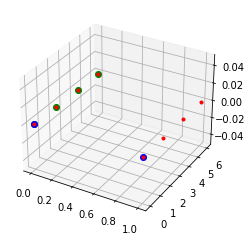

In [6]:
X: np.array = np.arange(2)
Y: np.array = np.linspace(0, 6, 4)
product: np.matrix = cartesian(X, Y)
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot(projection='3d')
axes.plot(np.zeros(Y.shape[0]), Y, 'o', color='green')
axes.plot(X, np.zeros(X.shape[0]), 'o', color='blue')
axes.plot(product[:,0], product[:,1], '.', color='red')
plt.show()

Plot the cartesian product of `(0, 1)`, `(0, 2, 4, 6)` & `(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)`.

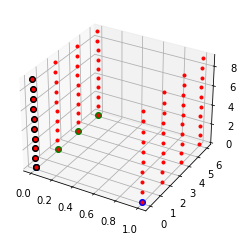

In [7]:
X: np.array = np.arange(2)
Y: np.array = np.linspace(0, 6, 4)
Z: np.array = np.arange(10)
product: np.matrix = cartesian(X, Y, Z)
figure: Figure = plt.figure()
axes: Axes = figure.add_subplot(projection='3d')
axes.plot(np.zeros(Y.shape[0]), Y, np.zeros(Y.shape[0]), 'o', color='green')
axes.plot(X, np.zeros(X.shape[0]), np.zeros(X.shape[0]), 'o', color='blue')
axes.plot(np.zeros(Z.shape[0]), np.zeros(Z.shape[0]), Z, 'o', color='black')
axes.plot(product[:,0], product[:,1], product[:,2], '.', color='red')
plt.show()

## The Principle of Addition

- https://www.sangakoo.com/en/unit/the-principle-of-addition-and-multplication
- https://numpy.org/doc/stable/reference/generated/numpy.union1d.html
- https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html

To count the elements of the union of two sets that have no elements in common, just add together the cardinals in each set. Nevertheless, if two sets have elements in common, the cardinals in each set will have to be added and the cardinal in the intersection will have to be reduced.

$$ |A \cup B| = |A| + |B| - |A \cap B| $$

Find the union of `(1, 2, 3, 4, 5)` & `(3, 4, 5, 6, 7, 8, 9)`.

In [8]:
A: np.array = np.array([1, 2, 3, 4, 5])
B: np.array = np.array([3, 4, 5, 6, 7, 8, 9])
union: np.array = np.union1d(A, B)
print(union.shape[0])
assert union.shape[0] == A.shape[0] + B.shape[0] - np.intersect1d(A, B).shape[0]
print(union)

9
[1 2 3 4 5 6 7 8 9]


## Permutations

### Permutations With Repetition - Arrangements

The permutations with repetition of  elements in which the first element recurs 
 times, the second 
 times... and the last one repeats itself 
 times, the different groups are of nelements that can be formed so that in every group, every element appears the stated number of times.

$$ \mathbf{A} \times \mathbf{A} = \{ (\boldsymbol{\alpha}_i, \boldsymbol{\alpha}_j) | \boldsymbol{\alpha}_i \in \mathbf{A}, \boldsymbol{\alpha}_j \in \mathbf{A} \} $$

$$ |\mathbf{A} \times \mathbf{A}| = |\mathbf{A}|^n - |\mathbf{A} \cap \mathbf{A}|^r $$

$$ V(r, n) = n^r $$

In [9]:
def arrangements(X: np.array, size: int = 0) -> np.matrix:
    """
    Generate a arrangements product of input arrays.
    """
    X = X.reshape(X.shape[0], X.shape[1] if X.ndim > 1 else 1)
    if not size:
        size = X.shape[0]
    if size == 1:
        return X
    Y: np.array = arrangements(X, size - 1)
    return cartesian(X, Y)

How many different ways can the letters P, Q, R, S be arranged?

In [10]:
X: np.matrix = np.array([ 1, 2, 3, 4 ])
product: np.matrix = arrangements(X, 4)
print(product.shape[0])
assert product.shape[0] == X.shape[0]**4
print(product)

256
[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 ...
 [4 4 4 2]
 [4 4 4 3]
 [4 4 4 4]]


How many different ways can the letters P, Q, R, S be arranged in groups of 3 letters?

In [11]:
X: np.matrix = np.array([ 1, 2, 3, 4 ])
product: np.matrix = arrangements(X, 3)
print(product.shape[0])
assert product.shape[0] == X.shape[0]**3
print(product)

64
[[1 1 1]
 [1 1 2]
 [1 1 3]
 [1 1 4]
 [1 2 1]
 [1 2 2]
 [1 2 3]
 [1 2 4]
 [1 3 1]
 [1 3 2]
 [1 3 3]
 [1 3 4]
 [1 4 1]
 [1 4 2]
 [1 4 3]
 [1 4 4]
 [2 1 1]
 [2 1 2]
 [2 1 3]
 [2 1 4]
 [2 2 1]
 [2 2 2]
 [2 2 3]
 [2 2 4]
 [2 3 1]
 [2 3 2]
 [2 3 3]
 [2 3 4]
 [2 4 1]
 [2 4 2]
 [2 4 3]
 [2 4 4]
 [3 1 1]
 [3 1 2]
 [3 1 3]
 [3 1 4]
 [3 2 1]
 [3 2 2]
 [3 2 3]
 [3 2 4]
 [3 3 1]
 [3 3 2]
 [3 3 3]
 [3 3 4]
 [3 4 1]
 [3 4 2]
 [3 4 3]
 [3 4 4]
 [4 1 1]
 [4 1 2]
 [4 1 3]
 [4 1 4]
 [4 2 1]
 [4 2 2]
 [4 2 3]
 [4 2 4]
 [4 3 1]
 [4 3 2]
 [4 3 3]
 [4 3 4]
 [4 4 1]
 [4 4 2]
 [4 4 3]
 [4 4 4]]


### Permutations Without Repetition

The permutations without repetition of `n` elements are the different groups of `n` elements that can be done, so that two groups differ from each other only in the order the elements are placed.

$$ P(n, r) = \dfrac{n!}{(n-r)!} $$

`(n-r)!` is reducing `n!` so that the permutation contains the exact amount of elements that might differ from the possible options.

In [12]:
def permutations(X: np.array, size: int = 0) -> np.matrix:
    """
    Generate a permutations product of input arrays.
    """
    X = X.reshape(X.shape[0], X.shape[1] if X.ndim > 1 else 1)
    if size == 1 or X.shape[0] == 1:
        return X
    if not size:
        size = X.shape[0]
    return np.vstack([
        array
        for i, x in enumerate(X)
        for array in cartesian(x, permutations(np.delete(X, i), size - 1))
    ])

In how many ways can the first 5 digits be grouped in groups of 3?

In [13]:
X: np.matrix = np.array([ 1, 2, 3, 4, 5 ])
product: np.matrix = permutations(X, 3)
print(product.shape[0])
assert product.shape[0] == 5 * 4 * 3
print(product)

60
[[1 2 3]
 [1 2 4]
 [1 2 5]
 [1 3 2]
 [1 3 4]
 [1 3 5]
 [1 4 2]
 [1 4 3]
 [1 4 5]
 [1 5 2]
 [1 5 3]
 [1 5 4]
 [2 1 3]
 [2 1 4]
 [2 1 5]
 [2 3 1]
 [2 3 4]
 [2 3 5]
 [2 4 1]
 [2 4 3]
 [2 4 5]
 [2 5 1]
 [2 5 3]
 [2 5 4]
 [3 1 2]
 [3 1 4]
 [3 1 5]
 [3 2 1]
 [3 2 4]
 [3 2 5]
 [3 4 1]
 [3 4 2]
 [3 4 5]
 [3 5 1]
 [3 5 2]
 [3 5 4]
 [4 1 2]
 [4 1 3]
 [4 1 5]
 [4 2 1]
 [4 2 3]
 [4 2 5]
 [4 3 1]
 [4 3 2]
 [4 3 5]
 [4 5 1]
 [4 5 2]
 [4 5 3]
 [5 1 2]
 [5 1 3]
 [5 1 4]
 [5 2 1]
 [5 2 3]
 [5 2 4]
 [5 3 1]
 [5 3 2]
 [5 3 4]
 [5 4 1]
 [5 4 2]
 [5 4 3]]


In how many ways can the first 5 digits be grouped in groups of 2?

In [14]:
X: np.matrix = np.array([ 1, 2, 3, 4, 5 ])
product: np.matrix = permutations(X, 2)
print(product.shape[0])
assert product.shape[0] == 5 * 4
print(product)

20
[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 1]
 [2 3]
 [2 4]
 [2 5]
 [3 1]
 [3 2]
 [3 4]
 [3 5]
 [4 1]
 [4 2]
 [4 3]
 [4 5]
 [5 1]
 [5 2]
 [5 3]
 [5 4]]


How many ways can the letters in the name RAMONA be arranged? Observe that the letter `A` appears twice and all other letters appear once in the word.

In [15]:
X: np.matrix = np.array([ 1, 2, 3, 4, 5 ])
product: np.matrix = permutations(X, 2)
print(product.shape[0])
assert product.shape[0] == 5 * 4
print(product)

20
[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 1]
 [2 3]
 [2 4]
 [2 5]
 [3 1]
 [3 2]
 [3 4]
 [3 5]
 [4 1]
 [4 2]
 [4 3]
 [4 5]
 [5 1]
 [5 2]
 [5 3]
 [5 4]]


How many ten-digit positive integers are there such that: each digit appears exactly once, the first digit is odd and five even digits appear in five consecutive positions?

$$ 5 \times 5 \times 5! \times 4! $$

In [16]:
even: np.array = np.array([0, 2, 4, 6, 8])
odd: np.array = np.array([1, 3, 5, 7, 9])
size: int = 10
all_even_permutations: np.matrix = permutations(even)
all_odd_permutations: np.matrix = permutations(odd)
result: np.matrix = np.matrix([
    np.concatenate((x[:i], y, x[i:]))
    for x in all_odd_permutations
    for y in all_even_permutations
    for i in range(1, size - even.shape[0] + 1)
])
print(result.shape[0])
assert result.shape[0] == 5 * math.factorial(5) * math.factorial(5)

72000


### Permutations with Repeated Elements

The permutations with `n` repetition of  elements in which the first element recurs `k1` times, the second `k2` times... and the last one repeats itself `km` times, the different groups are of nelements that can be formed so that in every group, every element appears the stated number of times.

$$ P(n, k1, k2, ..., km) = \dfrac{n!}{k_1! k_2! ... k_m!} $$

In this case, `k1!` is reducing `n!` by the amount of repetitions of the first element, `k2!` is reducing `n!` by the amount of repetitions of the second element and so forth.

How many 5-digits are that so that 1 is repeated 2 times?

In [17]:
X: np.array = np.array([1, 1, 2, 3, 4])
A: np.array = np.array([1, 1])
product: np.matrix = permutations(X, 5)
repetitions: np.matrix = permutations(A, 2)
assert product.shape[0] / repetitions.shape[0] == math.factorial(5) / math.factorial(2)

How many 5-digits are that so that 1 is repeated 3 times an 2 is repeated 2 times?

In [18]:
x: np.array = np.ones(3)
y: np.array = np.zeros(0)
counter: int = 1
for i in range(3):
    for j in range(i + 1, 5):
        z = np.ones(5)
        z[i] = 0
        z[j] = 0
        print(counter, z)
        counter += 1
assert counter == math.factorial(5) / (math.factorial(3) * math.factorial(2))

1 [0. 0. 1. 1. 1.]
2 [0. 1. 0. 1. 1.]
3 [0. 1. 1. 0. 1.]
4 [0. 1. 1. 1. 0.]
5 [1. 0. 0. 1. 1.]
6 [1. 0. 1. 0. 1.]
7 [1. 0. 1. 1. 0.]
8 [1. 1. 0. 0. 1.]
9 [1. 1. 0. 1. 0.]


In how many ways can the letters A, A, B, C, D be arranged?

In [19]:
X: np.array = np.array([1, 1, 2, 3, 4])
A: np.array = np.array([1, 1])
product: np.matrix = permutations(X)
repetitions: np.matrix = permutations(A)
result: int = product.shape[0] / repetitions.shape[0]
print(product.shape, repetitions.shape, result)
assert result == math.factorial(5) / math.factorial(2)

(120, 5) (2, 2) 60.0


In how many ways can the letters A, A, B, B, B, C, D be arranged?

In [20]:
X: np.array = np.array([1, 1, 2, 2, 2, 3, 4])
A: np.array = np.array([1, 1])
B: np.array = np.array([2, 2, 2])
product: np.matrix = permutations(X)
A_repetitions: np.matrix = permutations(A)
B_repetitions: np.matrix = permutations(B)
result: int = product.shape[0] / (A_repetitions.shape[0] * B_repetitions.shape[0])
print(product.shape, repetitions.shape, result)
assert result == math.factorial(7) / (math.factorial(2) * math.factorial(3))

(5040, 7) (2, 2) 420.0


## Combinations

### Combinations Without Repetition

The combinations without repetition of `n` elements taken `r` in `r` are the different groups of `r` elements that can be formed by these `n` elements, so that two groups differ only if they have different elements (that is to say, the order does not matter).

$$ K(n, r) = \dfrac{n!}{r!(n-r)!} = \dbinom{n}{r} $$

`(n-r)!` is reducing `n!` so that the permutation contains the exact amount of elements that might differ from the possible options. In addition, `r!` is reducing `n!` by the amount of repeated elements.

In [21]:
def combinations(X: np.array, size: int) -> np.matrix:
    """
    Generate a combinations product of input arrays.
    """
    X = np.unique(X).reshape(X.shape[0], X.shape[1] if X.ndim > 1 else 1)
    if size == 1:
        return X
    Y: np.array = permutations(X[1:], size - 1)
    return cartesian(X, Y)

Find all distinct pairs among letters A, B, C, D, E

In [22]:
X: np.array = np.array([1, 2, 3, 4, 5])
product: np.matrix = combinations(X, 2)
print(product.shape[0])
assert product.shape[0] == 5 * 4
print(product)

20
[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [5 2]
 [5 3]
 [5 4]
 [5 5]]


### Combinations With Repetition

The combinations with repetition of `n` taken elements of `r` in `r` are the different groups of `r` elements that can be formed from these `n` elements, allowing the elements to repeat themselves, and considering that two groups differ only if they have different elements (that is to say, the order does not matter).

$$ KR(n, r) = \dfrac{(n+r-1)!}{r!(n-1)!} = \dbinom{n + r - 1}{r} $$

In [17]:
def combinations_with_repetitions(X: np.array, size: int) -> np.matrix:
    """
    Generate a combinations with replacement product of input arrays.
    """
    product: np.matrix = arrangements(X, size)
    product.sort()
    return np.unique(product, axis=0)

In how many can the elements `1, 2, 3, 4, 5` be combined with repetition in groups of `2` elements?

In [18]:
X: np.array = np.array([1, 2, 3, 4, 5])
product: np.matrix = combinations_with_repetitions(X, 2)
print(product.shape[0])
assert product.shape[0] == math.factorial(5 + 2 - 1) / (math.factorial(2) * math.factorial(5 + 2 - 1 - 2))
print(product)

15
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [3 3]
 [3 4]
 [3 5]
 [4 4]
 [4 5]
 [5 5]]
